# Workshop 7 

### Outline: 
 
1. Multi-Class Classifcation: Classifying newswires (Chapter 3)
2. Regression with Deep Learning (Chapter 3)

Source: Deep Learning with Keras, François Chollet, 2017

### 1. Classifying Newswires

In [1]:
# Loading the reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# As with the IMDB dataset, the argument num_words=10000 restricts the data to the
# 10,000 most frequently occurring words found in the data.

Using TensorFlow backend.
/Users/demircanm/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/demircanm/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/demircanm/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/demircanm/opt/anaconda3/l

In [2]:
# Each data point is just a list of indexes of the top 10000 frequent words
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [3]:
# Decoding a encoded newswire data sample
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [4]:
# Objective: Transform this list into a "bag of word" model
# The students did not participate in AA: https://en.wikipedia.org/wiki/Bag-of-words_model

In [5]:
import numpy as np
# Transform to 10.000 Dimension Vector Space with a very simply bag of words approach
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # This is a very simple bag of words model 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# Range of training labels => 46 Topics
print("min: {} - max: {}".format(train_labels.min(),train_labels.max()))

min: 0 - max: 45


In [10]:
# Our training data is categorical, we have to transform it with one-hot-encoding into a proper format
# basically this creates dummy variables for each category
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### The Deep Neural Network Architecture
The problem at hand looks very similar to the problem we solved last week. However, instead of having 2 classes (positive and negative sentiment) we do have 46 classes. Thus, the dimensionality of the output space is much larger.

In [7]:
from keras import models
from keras import layers

# The raw network architecture
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


Note two things here:
1. Each input vector will be mapped to a 46d output vector
2. Last layer uses a softmax activation function. In other words, the present network will output a probability distribution 

##### The loss function
The best loss function to use in this case is categorical_crossentropy. It measures
the distance between two probability distributions: here, between the probability distribution
output by the network and the true distribution of the labels.

In [8]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

#### Validating our network

In [11]:
# Let's pick 1000 samples to use as a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# Training Phase with 20 epochs

In [12]:
# validation data = Data on which to evaluate the loss and any model metrics at the end of each epoch.
#                   The model will not be trained on this data.
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 278us/step - loss: 3.7870 - accuracy: 0.2207 - val_loss: 3.7316 - val_accuracy: 0.3840
Epoch 2/20
7982/7982 [==============================] - 1s 188us/step - loss: 3.6890 - accuracy: 0.4035 - val_loss: 3.6205 - val_accuracy: 0.4030
Epoch 3/20
7982/7982 [==============================] - 1s 187us/step - loss: 3.5627 - accuracy: 0.3847 - val_loss: 3.4686 - val_accuracy: 0.3860
Epoch 4/20
7982/7982 [==============================] - 2s 189us/step - loss: 3.3893 - accuracy: 0.3668 - val_loss: 3.2617 - val_accuracy: 0.3610
Epoch 5/20
7982/7982 [==============================] - 1s 179us/step - loss: 3.1618 - accuracy: 0.3559 - val_loss: 3.0050 - val_accuracy: 0.3560
Epoch 6/20
7982/7982 [==============================] - 2s 197us/step - loss: 2.9053 - accuracy: 0.3532 - val_loss: 2.7517 - val_accuracy: 0.3560
Epoch 7/20
7982/7982 [======

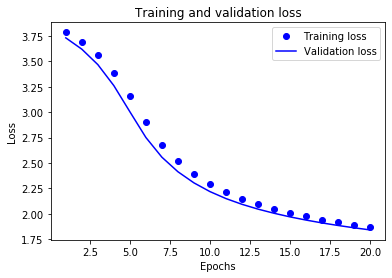

In [14]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

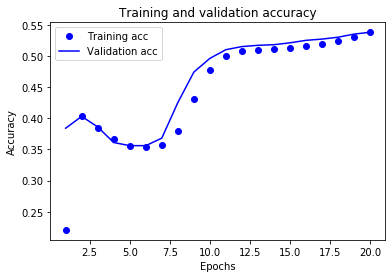

In [15]:
# Plotting the traning and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Task: Experiment

We have a output layer with 46 nodes. What happens to the accuracy when we reduce the number of nodes the second intermediate layer
to 2?

In [ ]:
# https://paste.ofcode.org/hg8jxvs9gapTfDLcnHZLtf
from keras import models
from keras import layers
import numpy as np

# Data
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Bag Of Words Model
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # This is a very simple bag of words model 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# The raw network architecture
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compile
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Transform to "dummy" columns 
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Validation Set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Fit
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

In [ ]:
# You can use: 
# Plotting the training and validation loss
# https://paste.ofcode.org/YPc7LSFpKRUMQ2G55a6tzX
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Solution:

In [19]:
#### Change number of nodes from 64 to 2
#### This causes a information bottleneck!!!
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 262us/step - loss: 3.7488 - accuracy: 0.3443 - val_loss: 3.6454 - val_accuracy: 0.3540
Epoch 2/20
7982/7982 [==============================] - 2s 227us/step - loss: 3.5020 - accuracy: 0.3514 - val_loss: 3.2952 - val_accuracy: 0.3540
Epoch 3/20
7982/7982 [==============================] - 2s 235us/step - loss: 3.0207 - accuracy: 0.3514 - val_loss: 2.7369 - val_accuracy: 0.3540
Epoch 4/20
7982/7982 [==============================] - 2s 225us/step - loss: 2.6002 - accuracy: 0.3514 - val_loss: 2.4553 - val_accuracy: 0.3540
Epoch 5/20
7982/7982 [==============================] - 2s 225us/step - loss: 2.4060 - accuracy: 0.3514 - val_loss: 2.3249 - val_accuracy: 0.3540
Epoch 6/20
7982/7982 [==============================] - 2s 226us/step - loss: 2.3134 - accuracy: 0.3514 - val_loss: 2.2548 - val_accuracy: 0.3540
Epoch 7/20
7982/7982 [==============================] - 2s 216us/step - loss

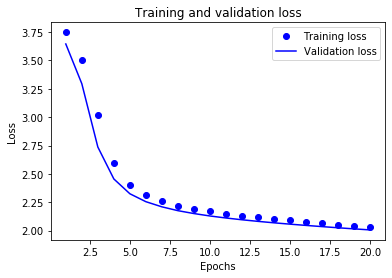

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

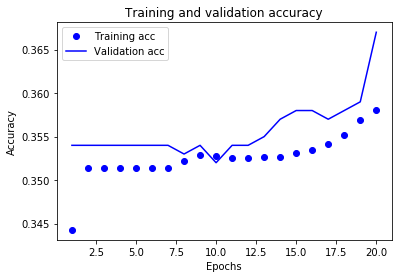

In [21]:
# Plotting the traning and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Take-Home Message:

1. N Classes => N Output Nodes
2. Output Layer should be a SoftMAX Activation function (provided that you want to a assign each data point to ONE class)
3. Categorical Crossentropy is in many cases the loss function you should use for classification
4. Avoid Information Bottlenecks (i.e., don't use hidden layers with too few nodes)

### 2. Regression with Deep Learning

In [22]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [23]:
# Traning Data
train_data.shape

(404, 13)

In [24]:
# Test Data
test_data.shape

(102, 13)

In [25]:
# Numerical Targets 
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

#### Preparing the data

In [27]:
# Standardizing the values (center around 0, std of 1)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [28]:
#### Building the network

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # MSE = Mean Squared Error
    # MAE = Mean Absolut Error
    # RMSPROP adaptive learning method based on Stochastic Gradient Descent
    # If you use SGD, your network might not converge....
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#### Introducing cross validation

Since we have so little data, the variance of the validation set might be high. To cope, we use k-fold cross validation.

In [29]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k # returns an integer instead of float
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i) 
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    # Slice Get Validation Data 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # Slice Val. Target Data
    
    # Exclude validation data from the training data
    partial_train_data = np.concatenate(
        [
            train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]
        ],
        axis=0)
    partial_train_targets = np.concatenate(
        [
            train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]
        ],
        axis=0)
    
    # Build Model
    model = build_model()
    
    # Fit Model
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Evaluate Model
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    # Add Mean Absolut Error to All Scored List
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [30]:
# Get MAE for each k-fold set
all_scores

[2.132519006729126, 2.608851909637451, 2.496135711669922, 2.3795418739318848]

In [31]:
# Compute Average
np.mean(all_scores)

2.404262125492096

In [91]:
# Okay, lets analyze how the validation error depends on the number of epochs 
# Rerun...

In [40]:
import numpy as np

k = 2
num_val_samples = len(train_data) // k # returns an integer instead of float
num_epochs = 500
all_mae_histories = [] # <-- This is changed

for i in range(k):
    print('processing fold #', i) 
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    # Slice Get Validation Data 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # Slice Val. Target Data
    
    # Exclude validation data from the training data
    partial_train_data = np.concatenate(
        [
            train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]
        ],
        axis=0)
    partial_train_targets = np.concatenate(
        [
            train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]
        ],
        axis=0)
    
    # Build Model
    model = build_model()
    
    # Fit Model # <-- This is changed
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # Cache MAE History  # <-- This is changed
    mae_history = history.history['mae']  
    
    # Add Mean Absolut Error to All Scored List # <-- This is changed
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1


In [35]:
# Each iteration generated a history object w
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

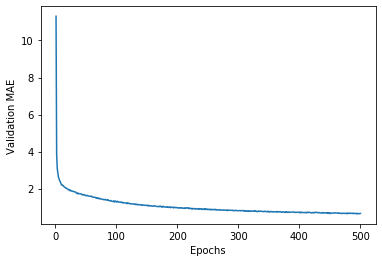

In [36]:
# Plot MAE History
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [37]:
# Evaluating the Model with the Test Set
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [38]:
# Voila.
test_mae_score

2.674461603164673

#### Take-Home Message
1. Mean squared error (MSE) is a loss function commonly used for regression.
2. A common regression metric is mean absolute error.
3. When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
4. When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
5. If there is little data, use small network. Otherwise your network might overfit.